In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

import orbit
from orbit.utils.dataset import load_iclaims
from orbit.eda import eda_plot

In [32]:
df = load_iclaims()
df['week'] = pd.to_datetime(df['week'])

/Users/U0596854/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/orbit/utils/dataset.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, parse_dates=["week"])


In [33]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


## Time Series Heat Map

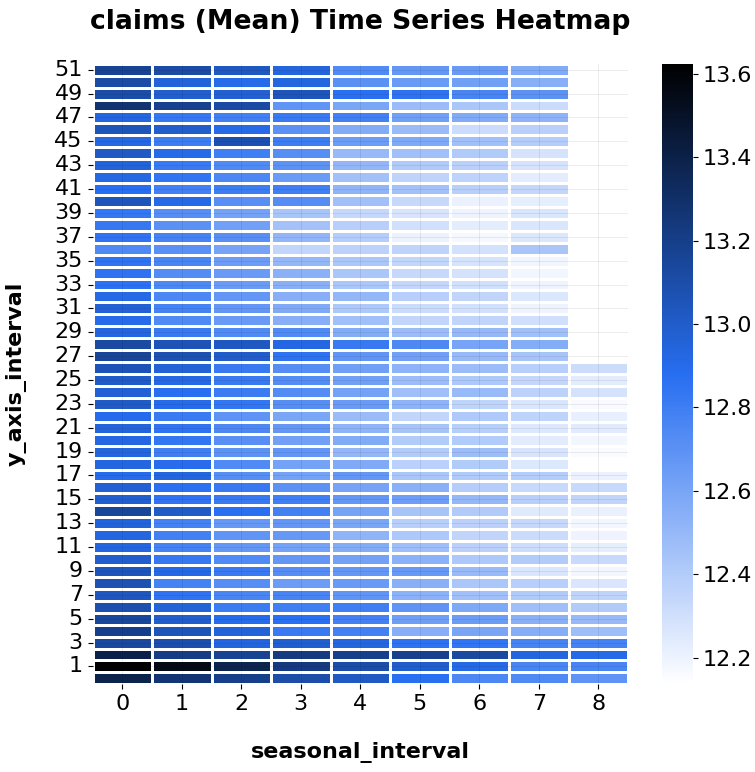

In [34]:
_ = eda_plot.ts_heatmap(df = df, date_col = 'week', seasonal_interval=52, 
                        value_col='claims')

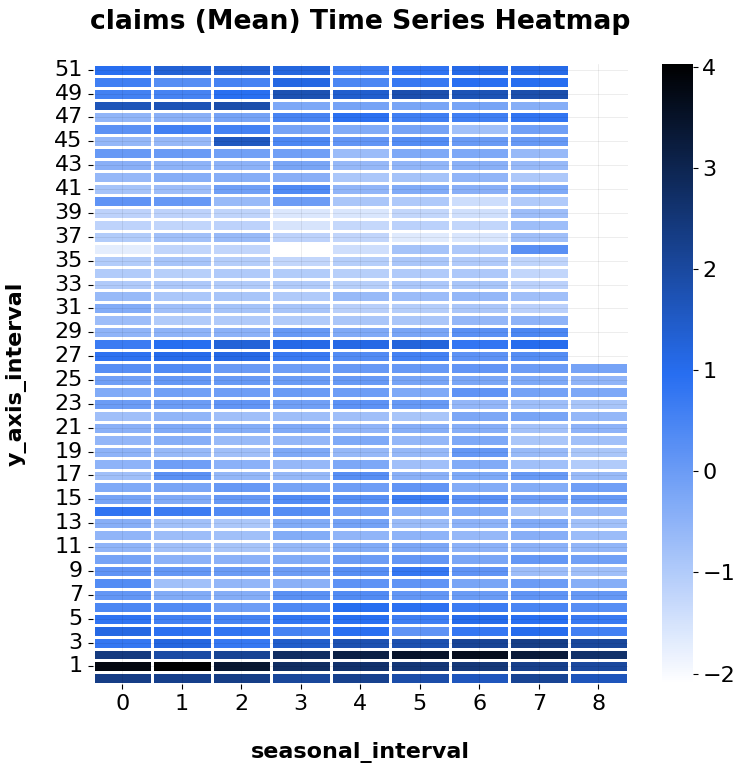

In [35]:
_ = eda_plot.ts_heatmap(df = df, date_col = 'week',  seasonal_interval=52, 
                        value_col='claims', normalization=True)

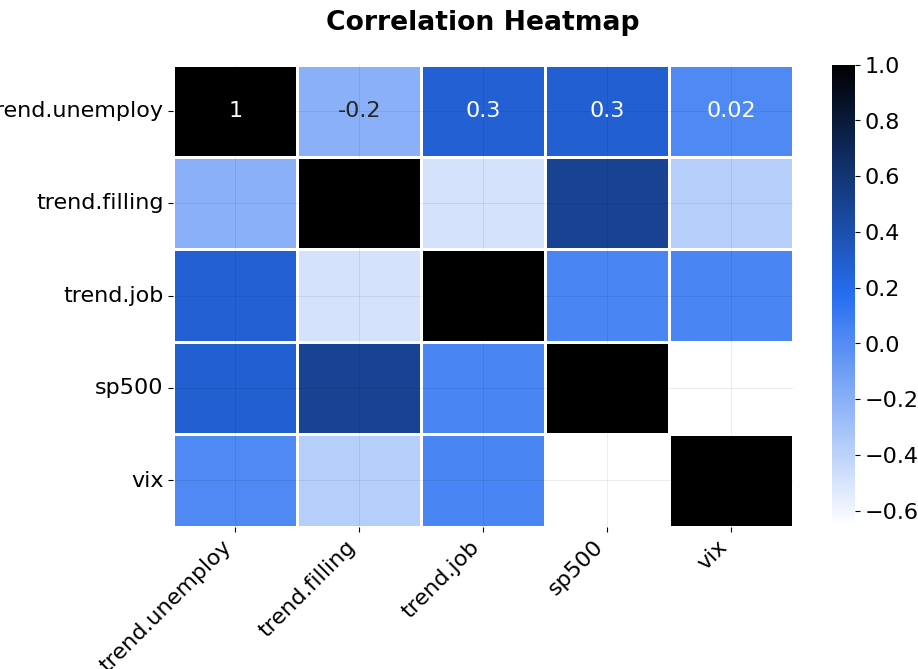

In [36]:
var_list = ['trend.unemploy', 'trend.filling', 'trend.job', 'sp500', 'vix']
_ = eda_plot.correlation_heatmap(df, var_list = var_list,
                                 fig_width=10, fig_height=6)

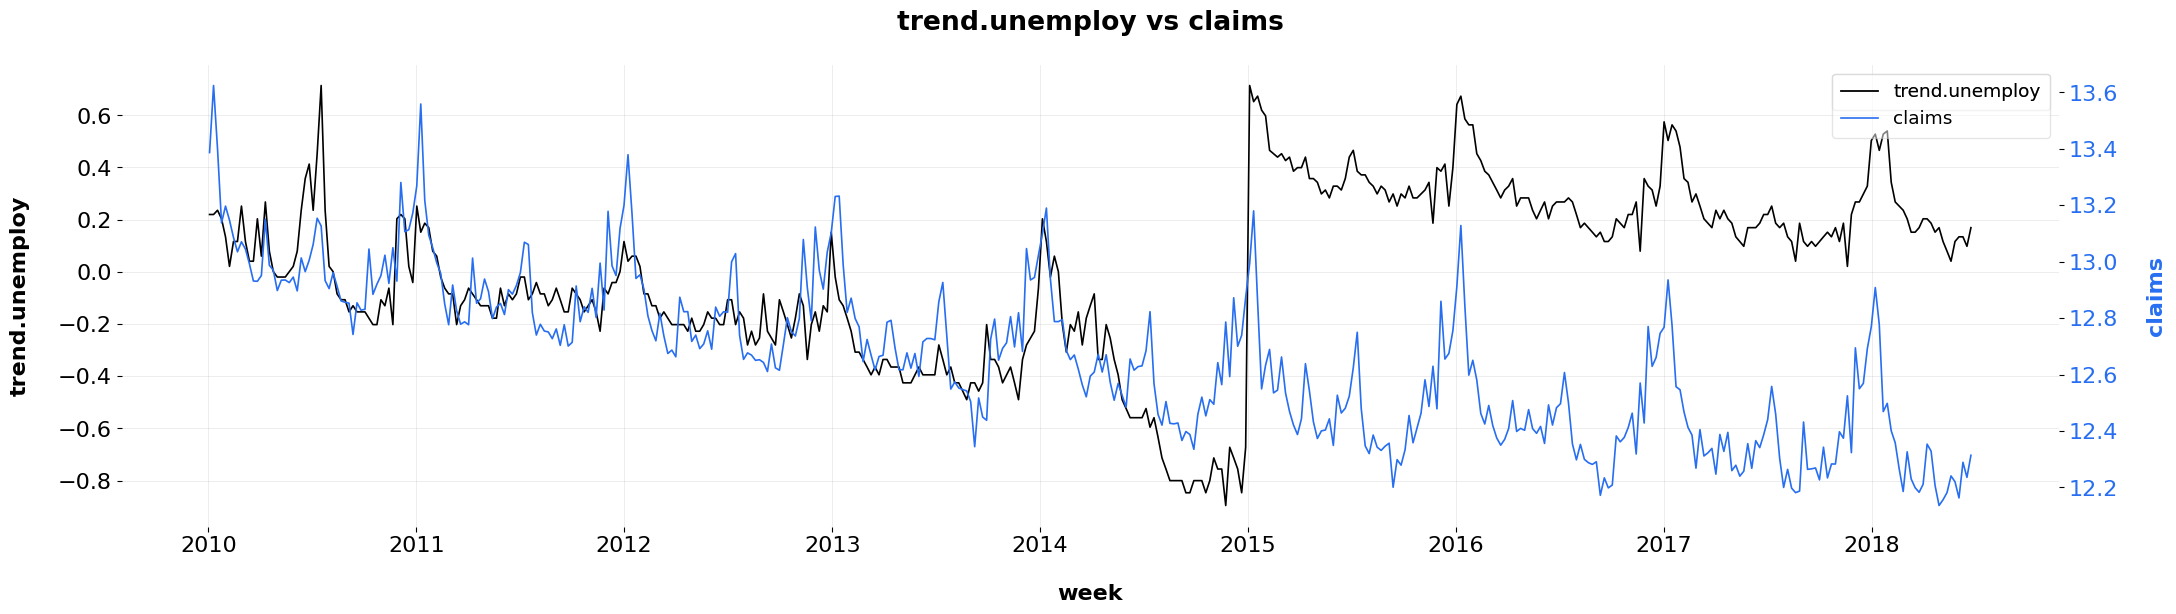

In [37]:
_ = eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week')

In [38]:
var_list=['week', 'trend.unemploy', 'trend.filling', 'trend.job', 'sp500', 'vix']
df[var_list].melt(id_vars = ['week'])

,week,variable,value
0,2010-01-03,trend.unemploy,0.219882
1,2010-01-10,trend.unemploy,0.219882
2,2010-01-17,trend.unemploy,0.236143
3,2010-01-24,trend.unemploy,0.203353
4,2010-01-31,trend.unemploy,0.134360
...,...,...,...
2210,2018-05-27,vix,-0.175192
2211,2018-06-03,vix,-0.275119
2212,2018-06-10,vix,-0.291676
2213,2018-06-17,vix,-0.152422


## Wrap plots for quick glance of data patterns

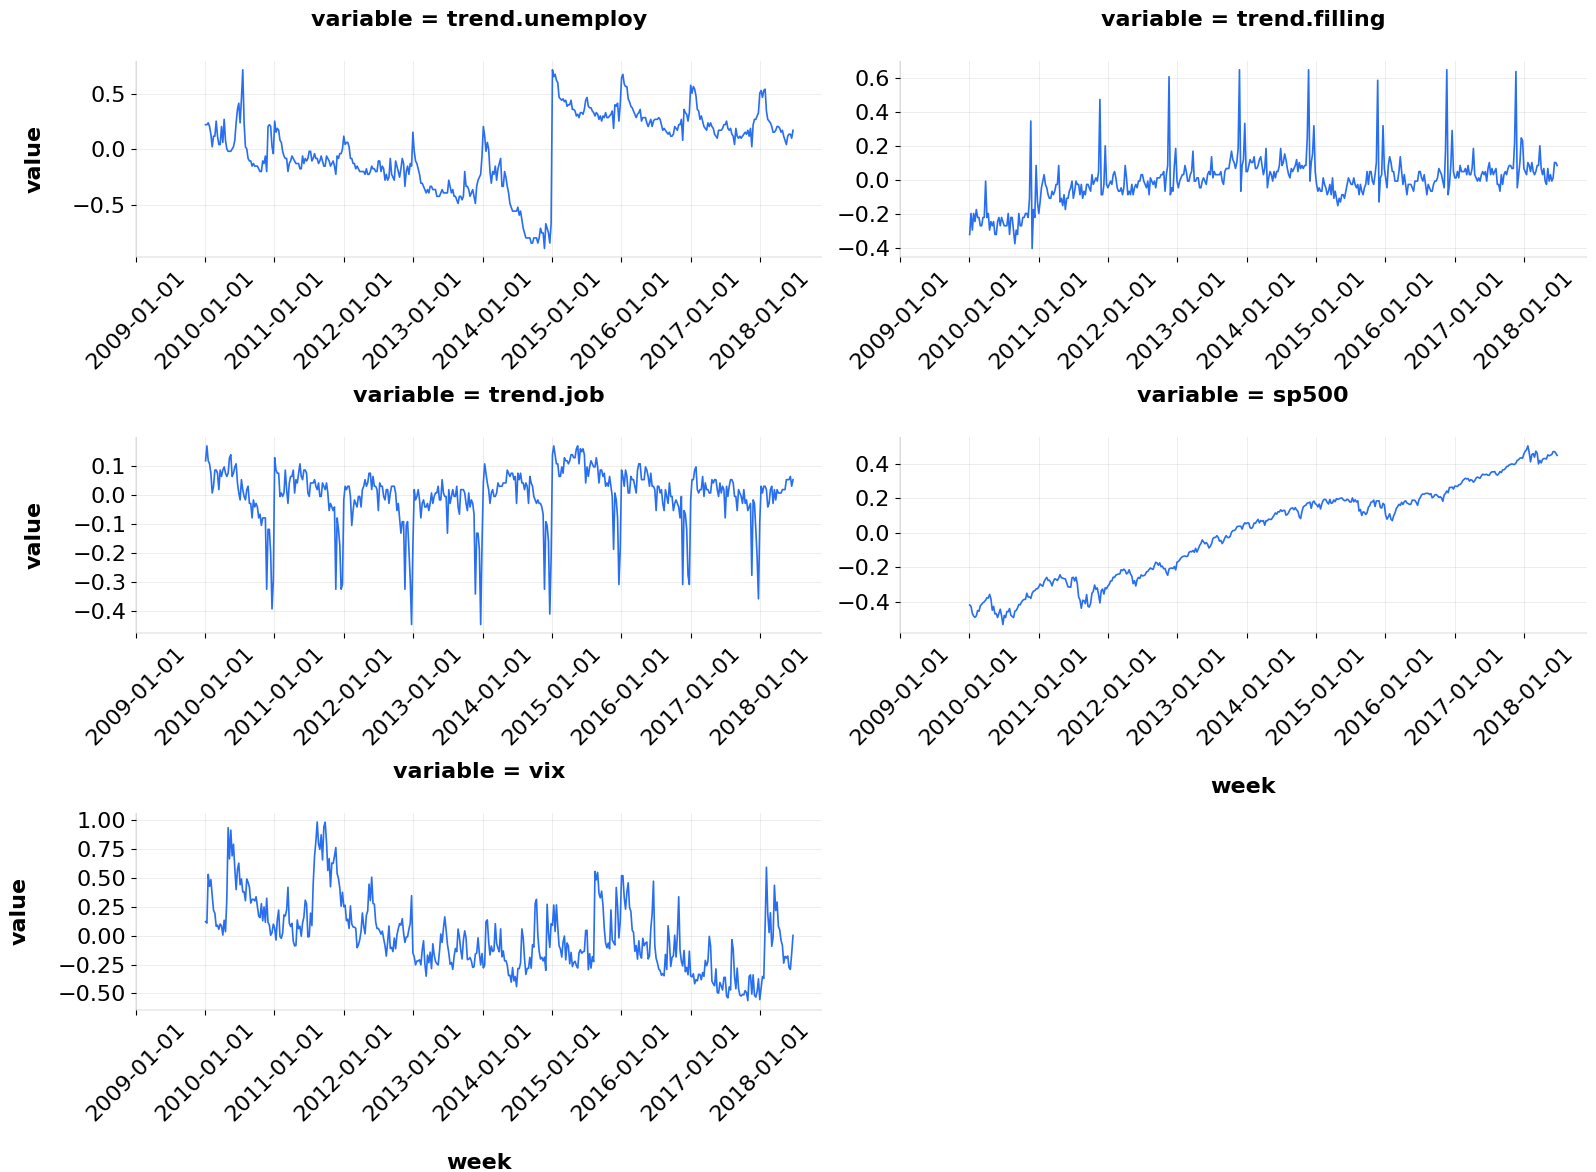

In [40]:
_ = eda_plot.wrap_plot_ts(df, 'week', var_list, col_wrap=2)

In [41]:
from orbit.utils.general import expand_grid, regenerate_base_df

In [42]:
expand_grid?

Signature: expand_grid(base)
Docstring:
Given a base key values span, expand them into a dataframe covering all combinations
Parameters
----------
base : dict
    dictionary with keys equal columns name and value equals key values

Returns
-------
pd.DataFrame : dataframe generate based on user specified base
File:      ~/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/orbit/utils/general.py
Type:      function

In [43]:
dt = pd.date_range('2020-01-31', '2022-12-31', freq='M')
keys = ['x' + str(x) for x in range(10)]
print(keys)
print(dt)

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')


In [44]:
df_base = expand_grid({
    'key': keys,
    'dt': dt,
})
x = np.random.normal(0, 1, 10 * 36)
df_base['x'] = x
print(df_base.shape)
df_base.head(5)

(360, 3)


,key,dt,x
0,x0,2020-01-31,-0.779478
1,x0,2020-02-29,1.140410
2,x0,2020-03-31,1.259245
3,x0,2020-04-30,1.191128
4,x0,2020-05-31,-0.265430


In [45]:
regenerate_base_df?

Signature: regenerate_base_df(df, time_col, key_col, val_cols=[], fill_na=None)
Docstring:
Given a dataframe, key column, time column and value column, re-generate multiple time-series to cover full range
date-time with all the keys.  This can be a useful utils for working multiple time-series.

Parameters
----------
df : pd.DataFrame
time_col : str
key_col : str
val_cols : List[str]; values column considered to be imputed
fill_na : Optional[float]; values to fill when there are missing values of the row

Returns
-------
File:      ~/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/orbit/utils/general.py
Type:      function

/Users/U0596854/Library/Caches/pypoetry/virtualenvs/pymc-statespace-cJ-90z5p-py3.10/lib/python3.10/site-packages/orbit/utils/dataset.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, parse_dates=["week"])
2023-09-18 16:44:44 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 500 and samples(per chain): 500.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

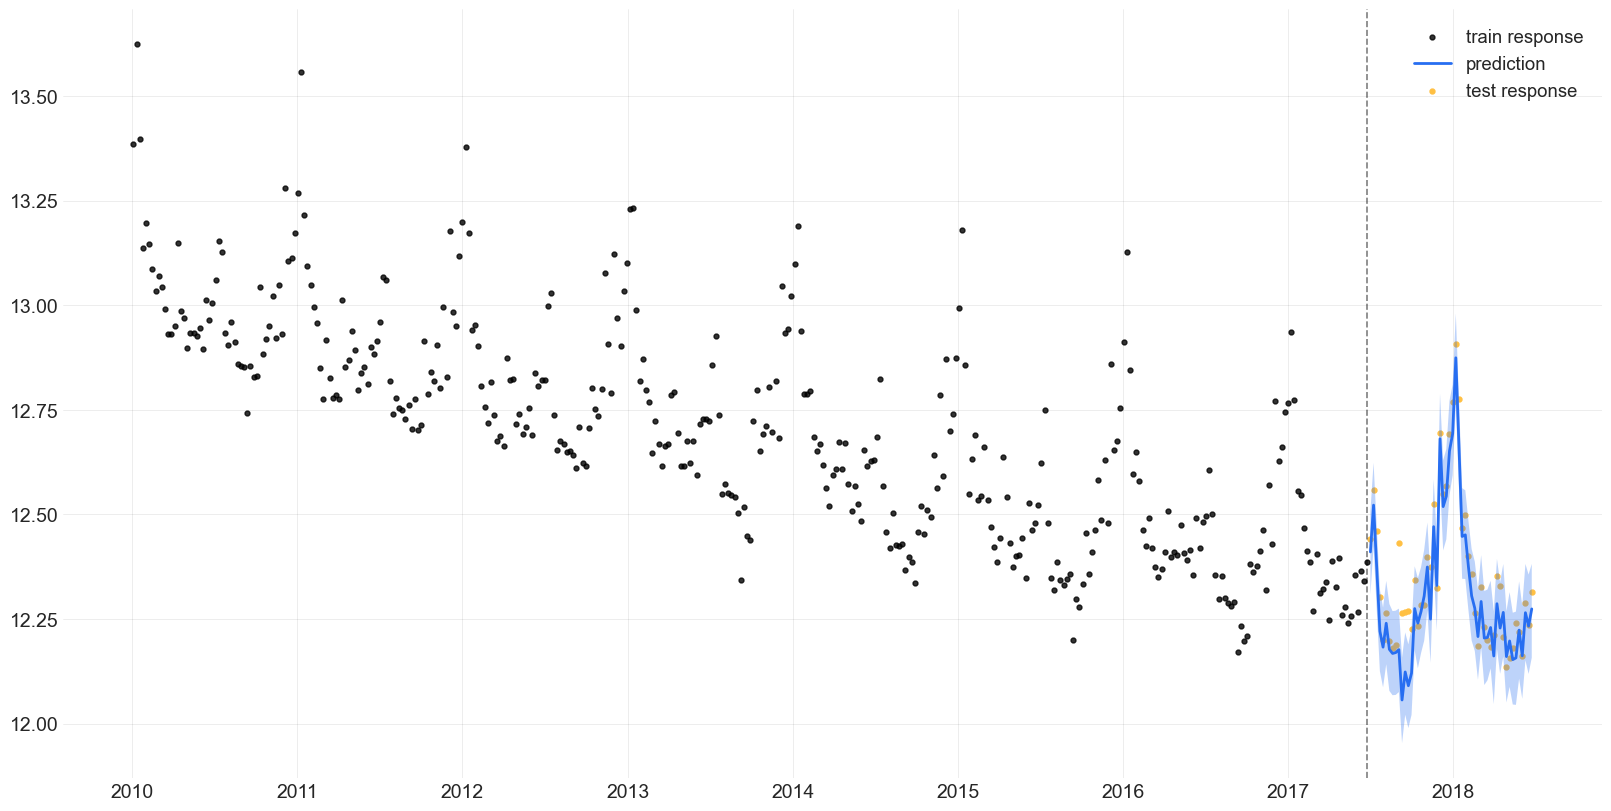

<Axes: >

In [60]:
from orbit.utils.dataset import load_iclaims
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

# log-transformed data
df = load_iclaims()
# train-test split
test_size = 52
train_df = df[:-test_size]
test_df = df[-test_size:]

dlt = DLT(
  response_col='claims', date_col='week',
  regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
  seasonality=52,
  num_warmup=2000,
  num_sample=2000,
  chains=4
)
dlt.fit(df=train_df)

# outcomes data frame
predicted_df = dlt.predict(df=test_df)

plot_predicted_data(
  training_actual_df=train_df, predicted_df=predicted_df,
  date_col=dlt.date_col, actual_col=dlt.response_col,
  test_actual_df=test_df
)

In [61]:
import arviz as az

posterior_samples = dlt.get_posterior_samples(relabel=True, permute=False)

In [62]:
posterior_samples.keys()

dict_keys(['l', 'b', 'lev_sm', 'slp_sm', 'obs_sigma', 'nu', 'lt_sum', 's', 'sea_sm', 'gt_sum', 'gb', 'gl', 'loglk', 'trend.unemploy', 'trend.filling', 'trend.job'])

array([[<Axes: ylabel='trend.unemploy'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='trend.filling'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='trend.unemploy', ylabel='trend.job'>,
        <Axes: xlabel='trend.filling'>, <Axes: xlabel='trend.job'>]],
      dtype=object)

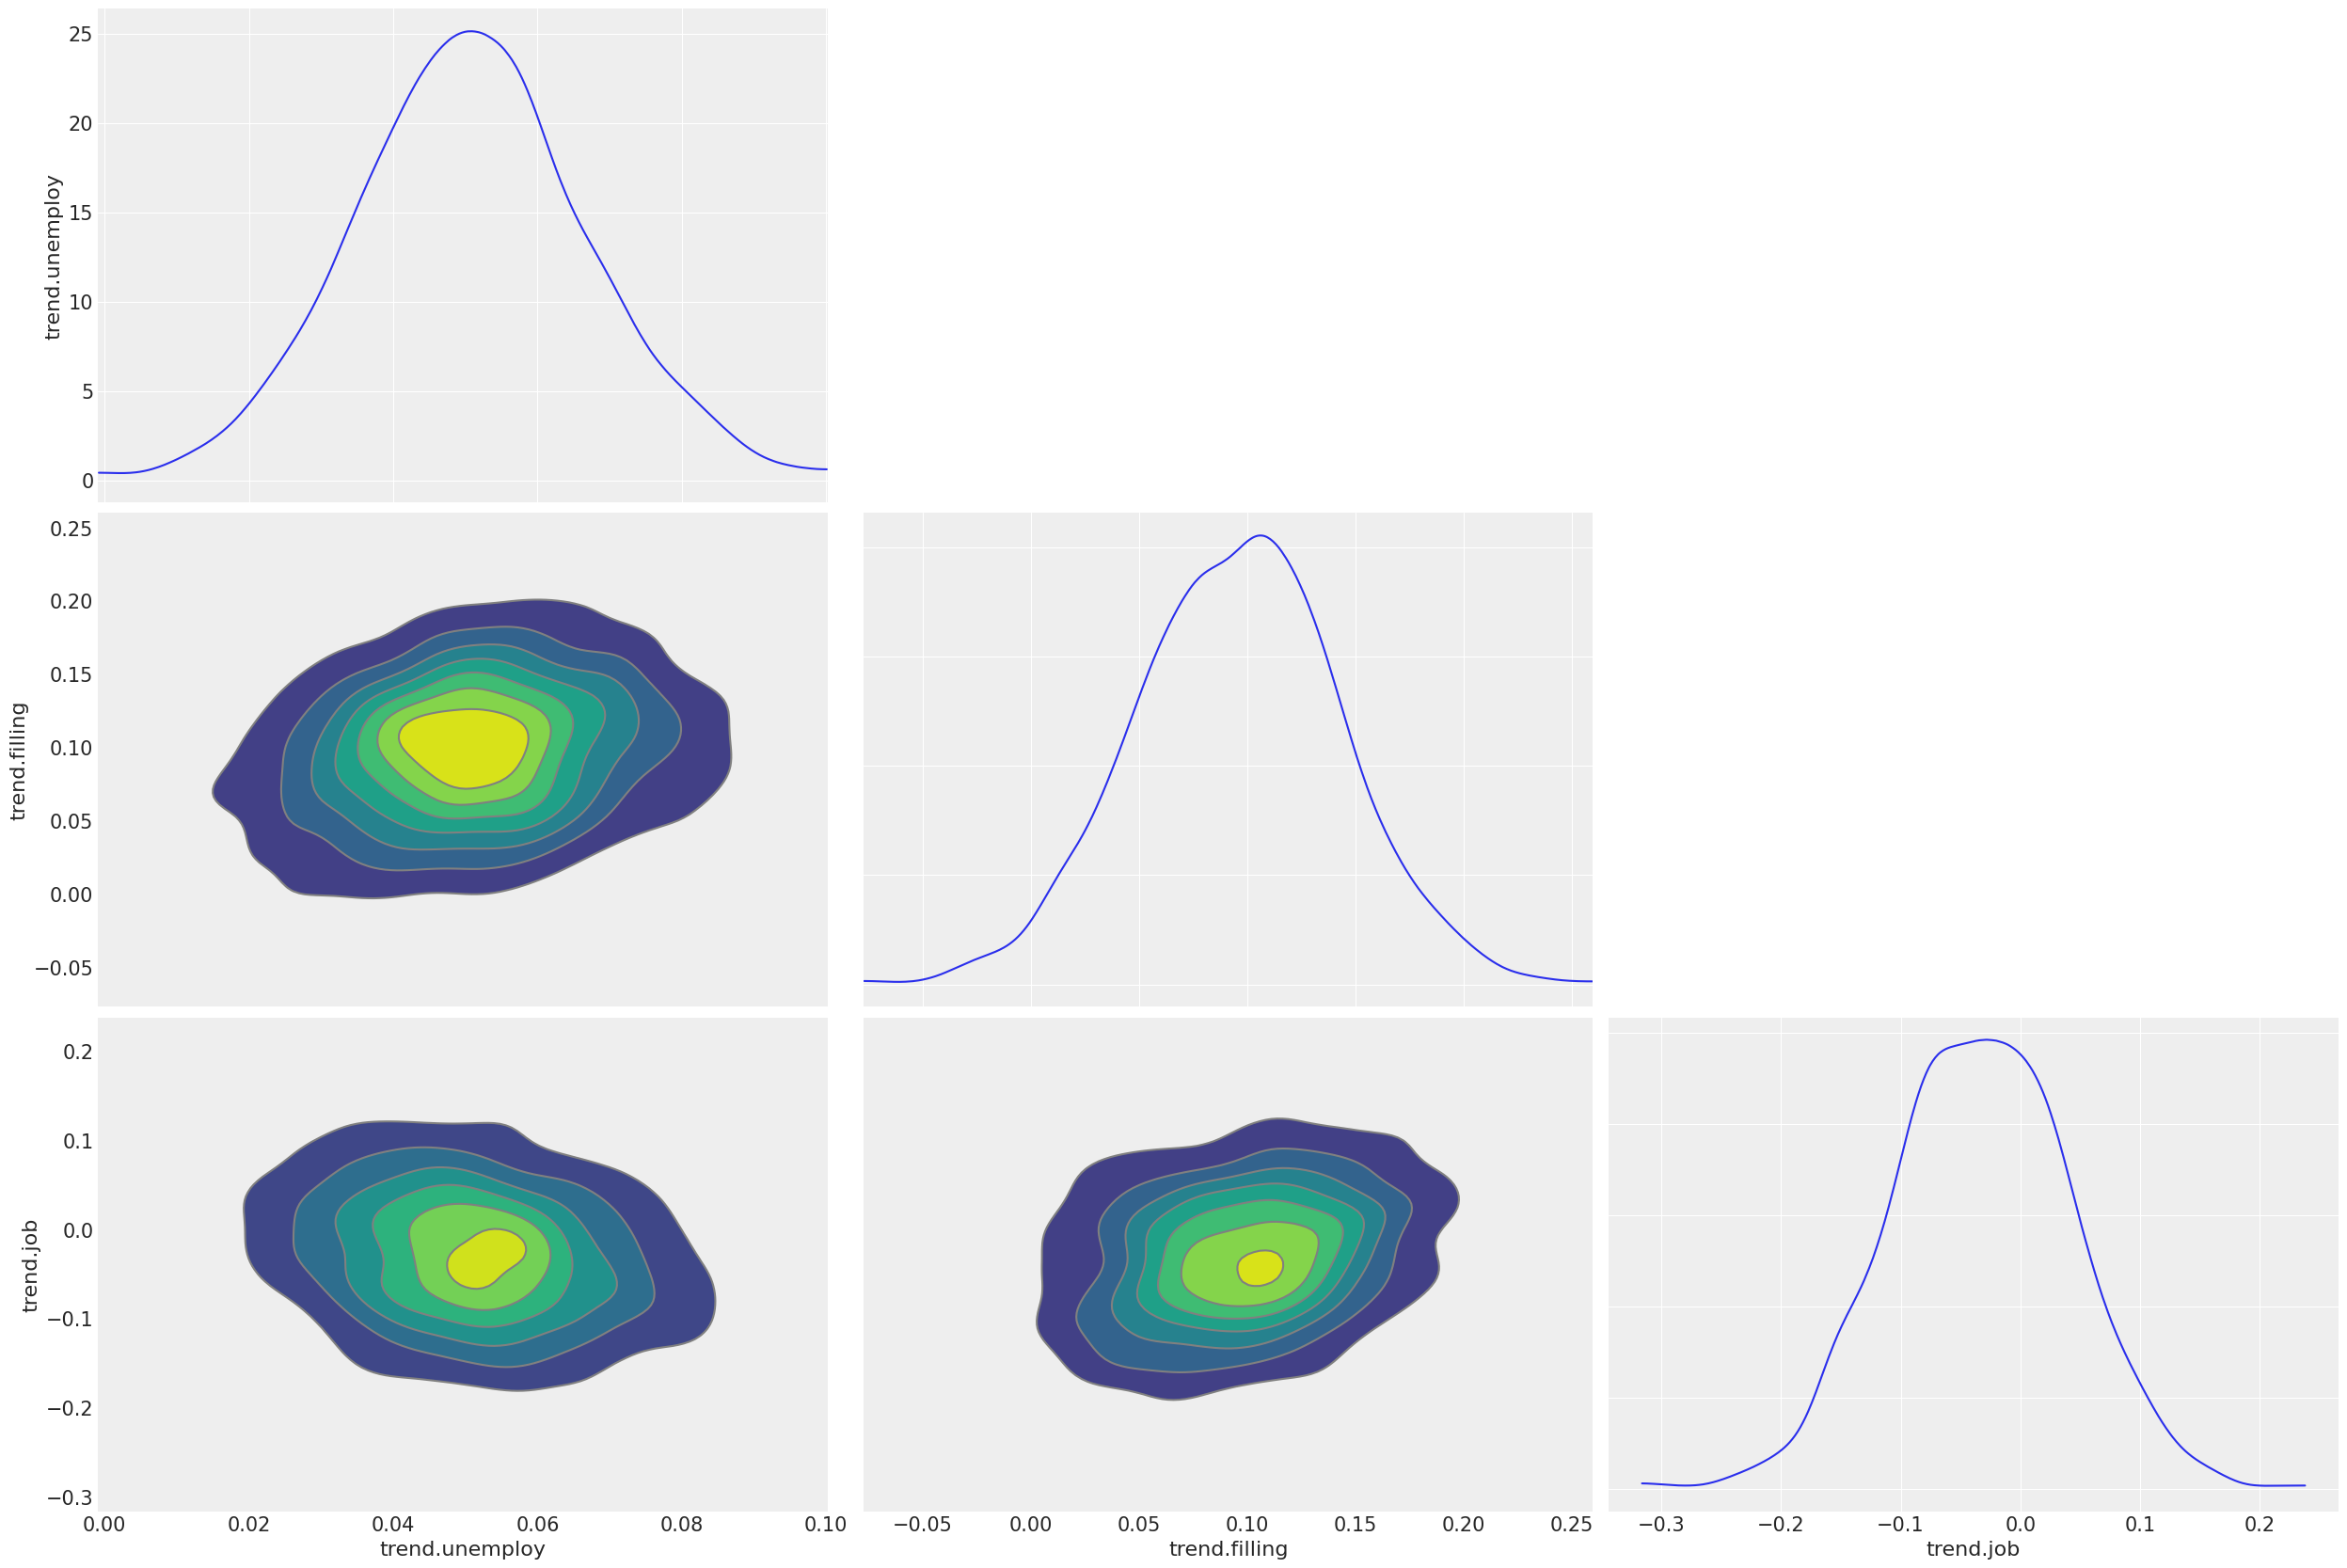

In [63]:
az.plot_pair(
    posterior_samples,
    var_names=['trend.unemploy', 'trend.filling', 'trend.job'],
    kind='kde',
    marginals=True,
    textsize=15
)

Convergence Status

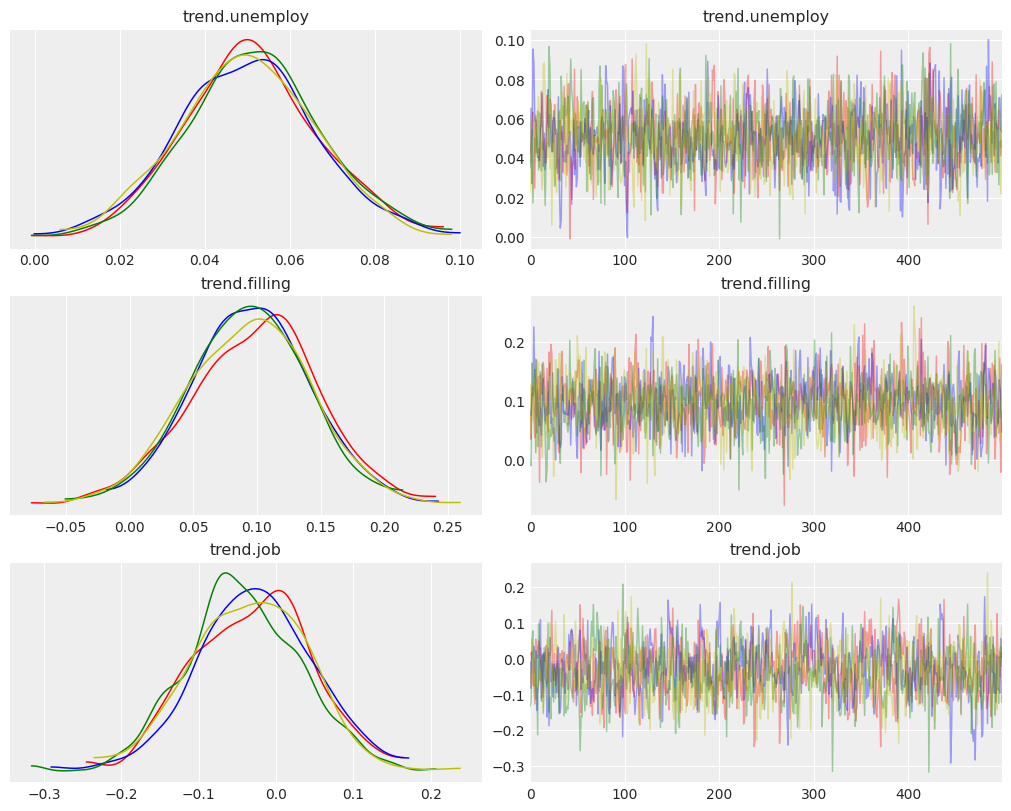

In [64]:
az.plot_trace(
    posterior_samples,
    var_names=['trend.unemploy', 'trend.filling', 'trend.job'],
    chain_prop={"color": ['r', 'b', 'g', 'y']},
    figsize=(10, 8),
);

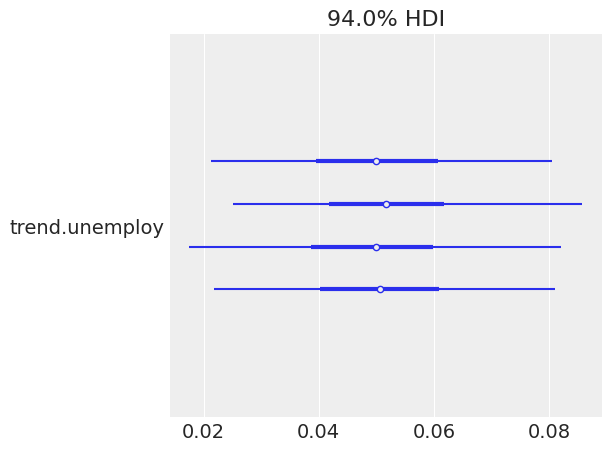

In [67]:
az.plot_forest(
    posterior_samples,
    var_names=['trend.unemploy'],
);